## Import required packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pytesseract import image_to_string

## License Plate OCR using Tesseract

This program will first take the detected license image from MobilenetSSD to check if it is a taxi number plate by image histogram analysis. (Using `np.bincount`) As we know Malaysia taxi number plate is white in color with black letters and vice versa for normal license plate. Therefore, by knowing the type of car plate is crucial for next step of processing. For more information regarding image histogram, please refer to opencv tutorial documentation: https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html. <br>

Then, this program will process the analysed license plate image regarding their type. For normal license plate, bitwise conversion is required before OCR, while taxi license plate need no extra processing on original image. <br>

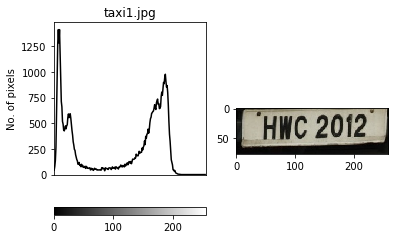

File: taxi1.jpg Result: HNC2012 Taxi: True


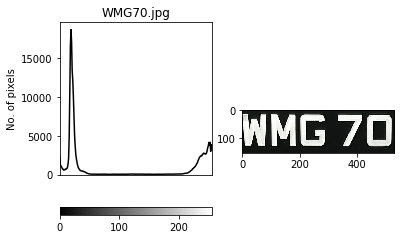

File: WMG70.jpg Result: WMG70 Taxi: False


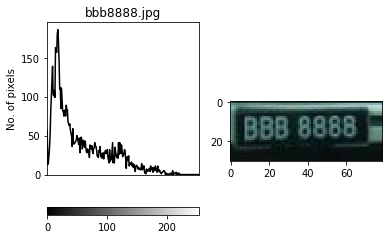

File: bbb8888.jpg Result: BBB8888 Taxi: False


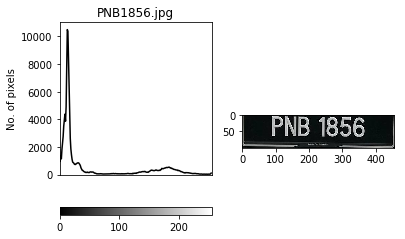

File: PNB1856.jpg Result: PNB1856 Taxi: False


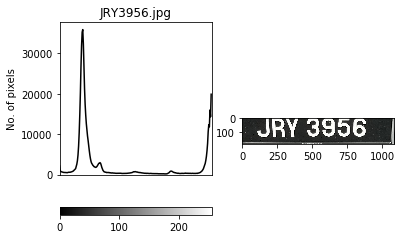

File: JRY3956.jpg Result:  Taxi: False


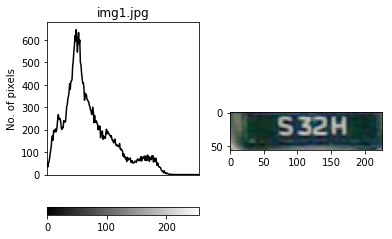

File: img1.jpg Result: S32H Taxi: False


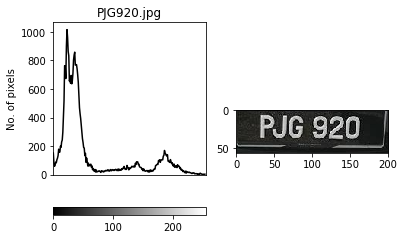

File: PJG920.jpg Result: PJG920 Taxi: False


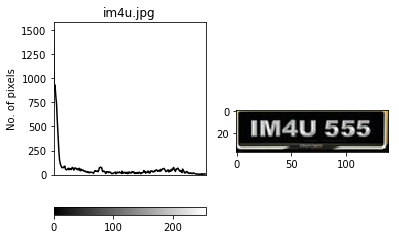

File: im4u.jpg Result: M4U555 Taxi: False


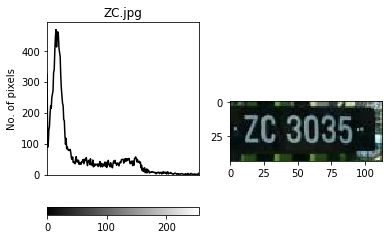

File: ZC.jpg Result: 203035 Taxi: False


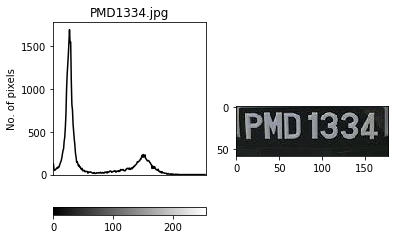

File: PMD1334.jpg Result: PMD1334 Taxi: False


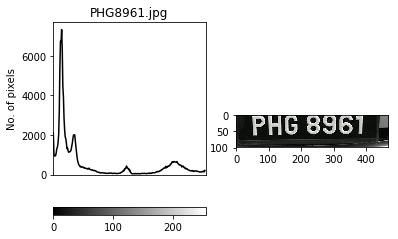

File: PHG8961.jpg Result: PHG8361 Taxi: False


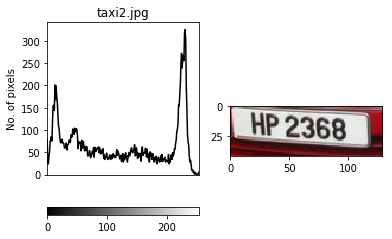

File: taxi2.jpg Result: HP2368 Taxi: True


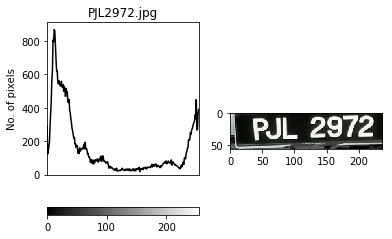

File: PJL2972.jpg Result: PJL2972 Taxi: False


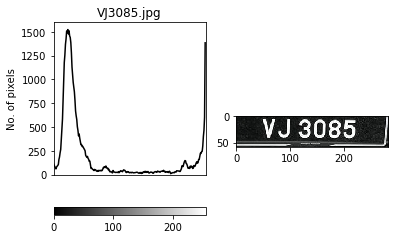

File: VJ3085.jpg Result: VJ3085 Taxi: False


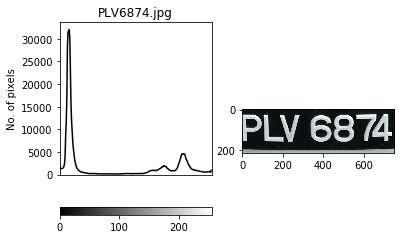

File: PLV6874.jpg Result: PLV6874 Taxi: False


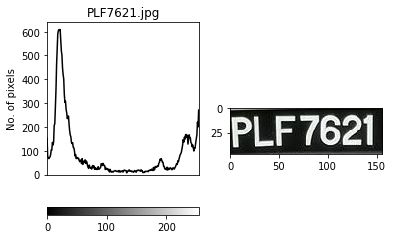

File: PLF7621.jpg Result: PLF7621 Taxi: False


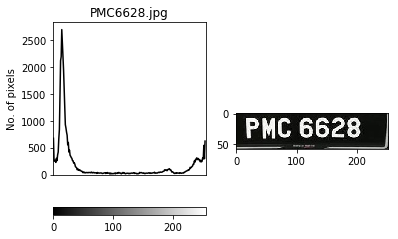

File: PMC6628.jpg Result: PMC6628 Taxi: False


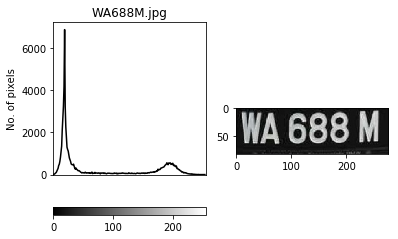

File: WA688M.jpg Result: WA688M Taxi: False


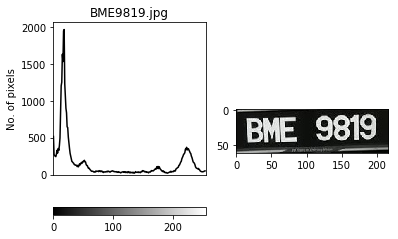

File: BME9819.jpg Result: BME9819 Taxi: False


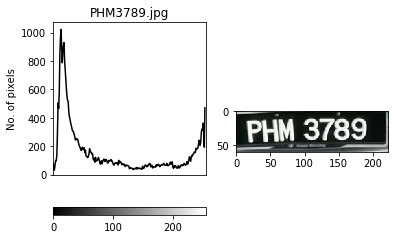

File: PHM3789.jpg Result: PHM3789 Taxi: False


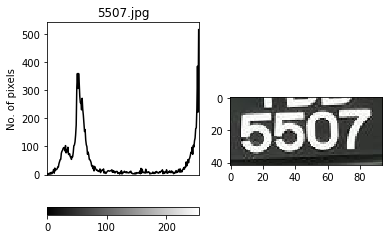

File: 5507.jpg Result: 5507 Taxi: False


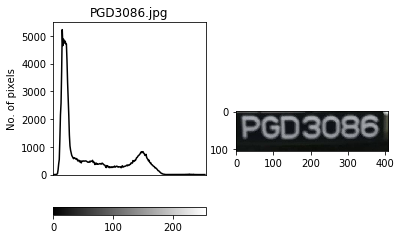

File: PGD3086.jpg Result: PGD3086 Taxi: False


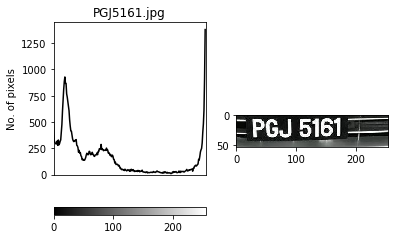

File: PGJ5161.jpg Result: PGJ5161 Taxi: False


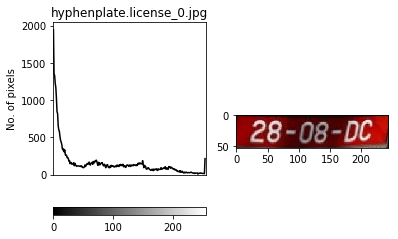

File: hyphenplate.license_0.jpg Result: 2808DC Taxi: False


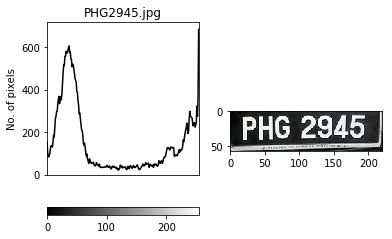

File: PHG2945.jpg Result: PHG2945 Taxi: False


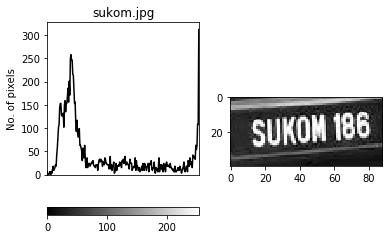

File: sukom.jpg Result: SUKM186 Taxi: False


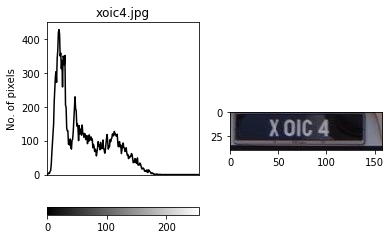

File: xoic4.jpg Result: X Taxi: False


In [2]:
def readimg(imgpath, image, color):
    mimg = mpimg.imread(imgpath + image)
    taxi = bincount_app(mimg)
    plt.title(image)
    plt.subplot(122)
    plt.imshow(mimg)
    plt.show()
    return taxi, mimg

def bincount_app(img):
    cmap = plt.get_cmap('gray')
    norm = mpl.colors.Normalize(vmin=0,vmax=255)
    histr = np.bincount(img.ravel(),minlength=256)
    taxi = check_if_its_taxi(histr)
    plt.subplot(121)
    plt.plot(histr, color='k')
    plt.xlim([0,256])
    plt.xticks([])
    plt.ylim(bottom=0)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, orientation='horizontal')
    plt.ylabel('No. of pixels')
    return taxi 

def check_if_its_taxi(histr):
    v1 = 0
    v2 = 0
    for i in range(0, 101):
        v1 += histr[i]
    for j in range(100, 256):
        v2 += histr[j]
    if v2 > v1:
        return True
    else:
        return False

def process_text(text):
    L = list(text)
    for t in text:
        if t not in char:
            L.remove(t)
    return ''.join(L)

imgfolderpath = '/home/yinghuit/Documents/license/'
char = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K',
        'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
        'W', 'X', 'Y', 'Z', '1', '2', '3', '4', '5', '6', 
        '7', '8', '9', '0']
config = ("-l eng --oem 1 --psm 7")
color = ('b','g','r')

for image in os.listdir(imgfolderpath):
    taxi, img = readimg(imgfolderpath, image, color)
    if taxi:
        text = image_to_string(img, config=config)
    else:
        text = image_to_string(cv2.bitwise_not(img), config=config)
    result = process_text(text)
    print('File: ' + image + ' Result: ' + result + ' Taxi: ' + str(taxi))
        
if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

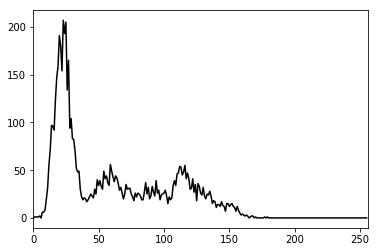

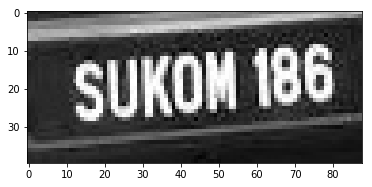

In [3]:
img_file = '/home/yinghuit/Documents/license/sukom.jpg'
mimg = mpimg.imread(img_file)

hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist, color = 'k')
plt.xlim([0,256])
plt.show()

plt.imshow(mimg)